<a href="https://colab.research.google.com/github/ilona1234/MISP/blob/main/zaj%C4%99cia%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rozwiązywanie problemów związanymi z obwodami elektrycznymi - zajęcia 5**

Instalacja biblioteki pulp

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp


Reading package lists... Done
Building dependency tree       
Reading state information... Done
coinor-cbc is already the newest version (2.9.9+repack1-1).
coinor-clp is already the newest version (1.16.11+repack1-1).
glpk-utils is already the newest version (4.65-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


**Problem 1 - minimalizacja mocy na mostku**

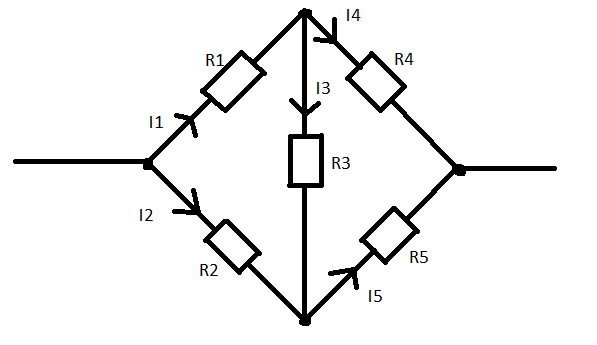

W tabeli sa podane wartości napięć i prądów na rezystorach

|  i        | 1 | 2  | 3 | 4 | 5 |   |
|-----------|---|----|---|---|---|---|
| Ui        | 6 | 10 | 4 | 7 | 3 | V |
| Ii        | 4 | 2  | 2 | 2 | 4 | mA |
| delta I   | 1 | 1  | 1 | 1 | 1 | mA |

Zadaniem jest dobranie rezystorów, aby zminimalizować moc na rezystorach.

**Etapy rozwiązania problemu:**
- **określenie zmiennych decyzyjnych**

  i1, i2, i3, i4, i5 - prądy płynące w ponumerowanych gałęziach
- **funkcja celu**

  minimalizacja wartości natężenia prądów, aby moc na rezystorach była najmniejsza

  funkcja = 6 * i1 + 10 * i2 + 4 * i3 + 7 * i4 + 3 * i5 
- **ustalenie ograniczeń**

  - wymagania dotyczące rozpływu prądów w gałęziach

    i3 + i4 = i1

    i2 + i3 = i5

    i1 + i2 = i4 + i5

Po rozwiązaniu problemu uzyskujemy wartości prądów w gałęziach oraz minimalną wartość mocy w mostku. Przy znanych wartościach napięć można wyznaczyć wartości rezystancji za pomoca wzoru:

Ri = Ui/Ii

In [ ]:
# Import PuLP modeler functions
from pulp import *

prob = LpProblem("Problem_obwod", LpMinimize)

i1 = LpVariable("i1",3,5) # inicjalizacja zmiennych  - prady w gałęziach
i2 = LpVariable("i2",1,3)
i3 = LpVariable("i3",1,3)
i4 = LpVariable("i4",1,3)
i5 = LpVariable("i5",3,5)

prob+=6.0*i1+10.0*i2+4.0*i3+7.0*i4+3.0*i5 # całkowita moc na mostku
prob+=i3+i4==i1 # warunki spełniające I prawo Kirchoffa
prob+=i2+i3==i5
prob+=i1+i2==i4+i5

prob.solve() # rozwiąznaie problemu

r1=6.0/value(i1) # obliczanie rezystancji 
r2=10.0/value(i2)
r3=4.0/value(i3)
r4=7.0/value(i4)
r5=3.0/value(i5)

# Wyświetlanie wartości prądów
for v in prob.variables():
  print (v.name, "=", v.varValue,"mA")

print("Wartości rezystancji to:")
print("R1=",r1, "kOhm")
print("R2=",r2, "kOhm")
print("R3=",r3, "kOhm")
print("R4=",r4, "kOhm")
print("R5=",r5, "kOhm")

print ("Minimalna moc to: ", value(prob.objective),"mV")

i1 = 3.0 mA
i2 = 1.0 mA
i3 = 2.0 mA
i4 = 1.0 mA
i5 = 3.0 mA
Wartości rezystancji to:
R1= 2.0 kOhm
R2= 10.0 kOhm
R3= 2.0 kOhm
R4= 7.0 kOhm
R5= 1.0 kOhm
Minimalna moc to:  52.0 mV


**Problem 2 - wyznaczenie maksymalnego prądu w obwodzie**

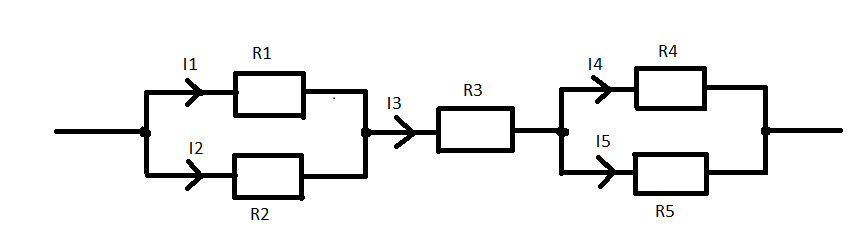

|  i        | 1 | 2  | 3 | 4 | 5 |   |
|-----------|---|----|---|---|---|---|
| Ri        | 8 | 6 | 4 | 10 | 8 | Ohm |
| Ii max       | 2 | 3  | 4 | 2 | 2 | A |

Zadaniem jest maksymalizacja prądu w gałęzi i3

**Etapy rozwiązania problemu:**
- **określenie zmiennych decyzyjnych**

  i1, i2, i3, i4, i5 - prądy płynące w ponumerowanych gałęziach
- **funkcja celu**

  maksymalizacja wartości natężenia prądu i3

  funkcja = i3
- **ustalenie ograniczeń**

  - wymagania dotyczące rozpływu prądów w gałęziach

    8 * i1 = 6 * i2

    10 * i4 = 8 * i5

    i1 + i2 = i3

    i4 + i5 = i3

Po rozwiązaniu problemu uzyskujemy wartości prądów w gałęziach.


In [ ]:
# Import PuLP modeler functions
from pulp import *

prob = LpProblem("Problem_obwod", LpMaximize)

i1 = LpVariable("i1",0,2) # inicjalizacja zmiennych prądów z ograniczeniami
i2 = LpVariable("i2",0,3)
i3 = LpVariable("i3",0,4)
i4 = LpVariable("i4",0,2)
i5 = LpVariable("i5",0,2)

prob+=i3
prob+=8.0*i1==6.0*i2
prob+=10.0*i4==8.0*i5
prob+=i1+i2==i3
prob+=i4+i5==i3

prob.solve() # rozwiązanie problemu

# wyświetlenie wartości prądów
for v in prob.variables():
  print (v.name, "=", v.varValue,"A")
